In [14]:
import os
import numpy as np
import matplotlib.pyplot as plt
import warnings
import random
import h5py
from PIL import Image

%matplotlib inline

warnings.filterwarnings('ignore')

In [15]:
data_dir = "Data/"

train_X = h5py.File(data_dir + "camelyonpatch_level_2_split_train_x.h5", 'r')['x']
train_y = h5py.File(data_dir + "camelyonpatch_level_2_split_train_y.h5", 'r')['y']

print(f"Size of train sample = {len(train_X)}")

Size of train sample = 262144


In [16]:
valid_X = h5py.File(data_dir + "camelyonpatch_level_2_split_valid_x.h5", 'r')['x']
valid_y = h5py.File(data_dir + "camelyonpatch_level_2_split_valid_y.h5", 'r')['y']

print(f"Size of valid sample = {len(valid_X)}")

Size of valid sample = 32768


In [17]:
test_X = h5py.File(data_dir + "camelyonpatch_level_2_split_test_x.h5", 'r')['x']
test_y = h5py.File(data_dir + "camelyonpatch_level_2_split_test_y.h5", 'r')['y']

print(f"Size of test sample = {len(test_X)}")

Size of test sample = 32768


In [18]:
train_labels, train_counts = np.unique(np.ravel(train_y), return_counts=True)
valid_labels, valid_counts = np.unique(np.ravel(valid_y), return_counts=True)
test_labels, test_counts = np.unique(np.ravel(test_y), return_counts=True)

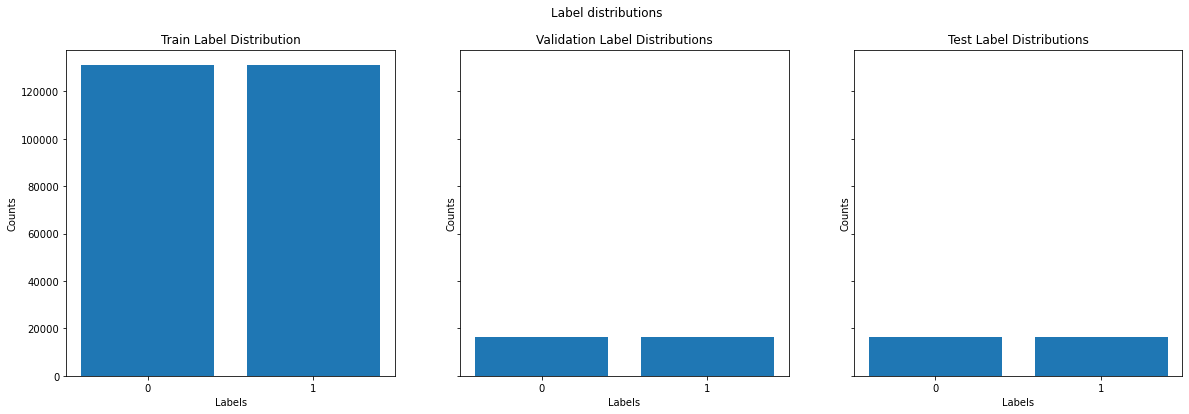

In [19]:
fig, ax = plt.subplots(1, 3, figsize=(20, 6), sharey=True)
train_labels, valid_labels, test_labels = list(train_labels), list(valid_labels), list(test_labels)

ax[0].bar(train_labels, train_counts)
ax[0].set_xticks(train_labels)
ax[0].set_xlabel("Labels")
ax[0].set_ylabel("Counts")
ax[0].set_title("Train Label Distribution")

ax[1].bar(valid_labels, valid_counts)
ax[1].set_xticks(valid_labels)
ax[1].set_xlabel("Labels")
ax[1].set_ylabel("Counts")
ax[1].set_title("Validation Label Distributions")

ax[2].bar(test_labels, test_counts)
ax[2].set_xticks(test_labels)
ax[2].set_xlabel("Labels")
ax[2].set_ylabel("Counts")
ax[2].set_title("Test Label Distributions")

fig.suptitle('Label distributions')

plt.show()

In [27]:
print(f"Number of positive labels in train data = {train_counts[0]}\n"
      f"Number of negative labels in train data = {train_counts[1]}\n")
print(f"Number of positive labels in valid data = {valid_counts[0]}\n"
      f"Number of negative labels in valid data = {valid_counts[1]}\n")
print(f"Number of positive labels in test data = {test_counts[0]}\n"
      f"Number of negative labels in test data = {test_counts[1]}\n")

Number of positive labels in train data = 131072
Number of negative labels in train data = 131072

Number of positive labels in valid data = 16399
Number of negative labels in valid data = 16369

Number of positive labels in test data = 16391
Number of negative labels in test data = 16377



In [74]:
def show_images(indexes: list, data: h5py._hl.dataset.Dataset, labels: h5py._hl.dataset.Dataset, title: str):
    fig, ax = plt.subplots(1, len(indexes), figsize=(15, 15))
    ax_id = 0
    for index in indexes:
        ax[ax_id].imshow(data[index])
        ax[ax_id].set_title("Label: {}".format(np.ravel(labels[index])))
        ax_id += 1
    fig.suptitle(title, x=0.5, y=0.65)
    plt.show

In [46]:
train_positive, train_negative = [], []
for i in range(len(train_X)):
    if train_y[i]:
        train_positive.append(i)
    else:
        train_negative.append(i)
        
valid_positive, valid_negative = [], []
for i in range(len(valid_X)):
    if valid_y[i]:
        valid_positive.append(i)
    else:
        valid_negative.append(i)
        
test_positive, test_negative = [], []
for i in range(len(test_X)):
    if test_y[i]:
        test_positive.append(i)
    else:
        test_negative.append(i)

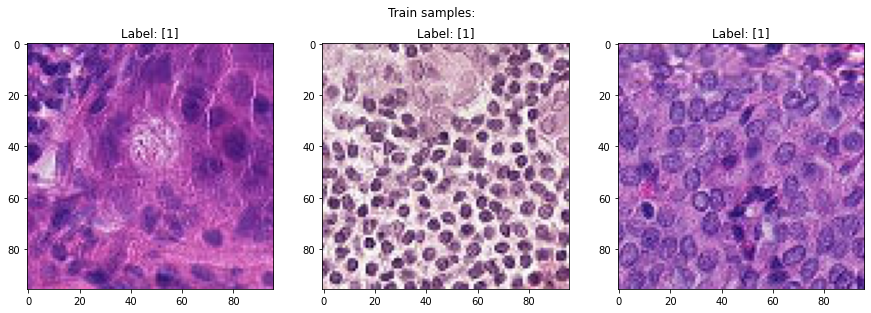

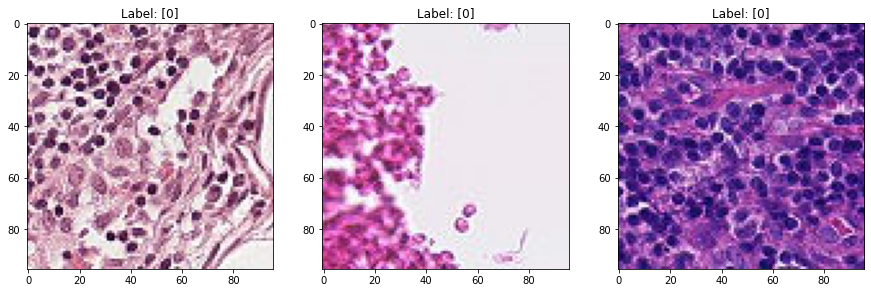

In [75]:
show_images(random.sample(train_positive, 3), train_X, train_y, "Train samples:")
show_images(random.sample(train_negative, 3), train_X, train_y, "")

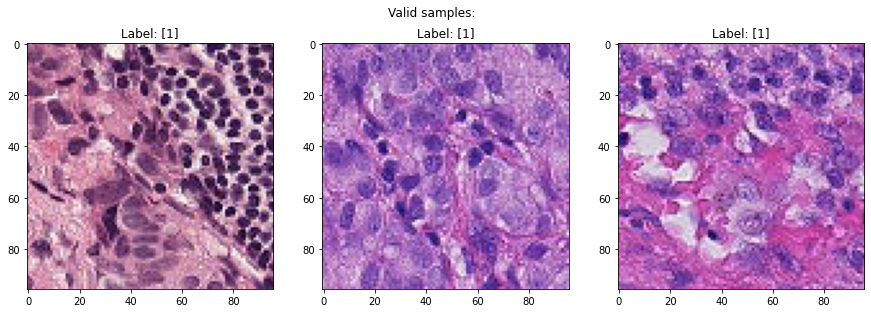

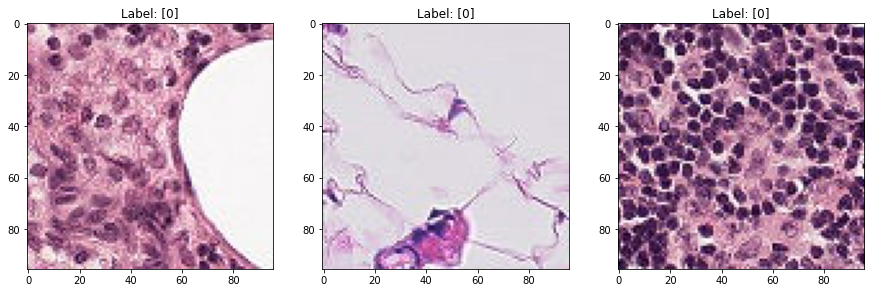

In [76]:
show_images(random.sample(valid_positive, 3), valid_X, valid_y, "Valid samples:")
show_images(random.sample(valid_negative, 3), valid_X, valid_y, "")

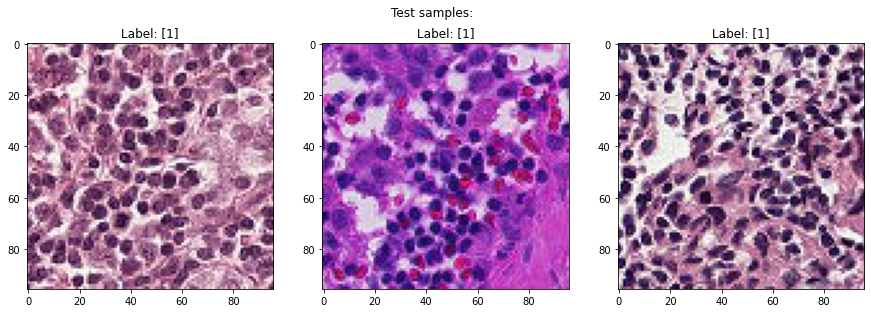

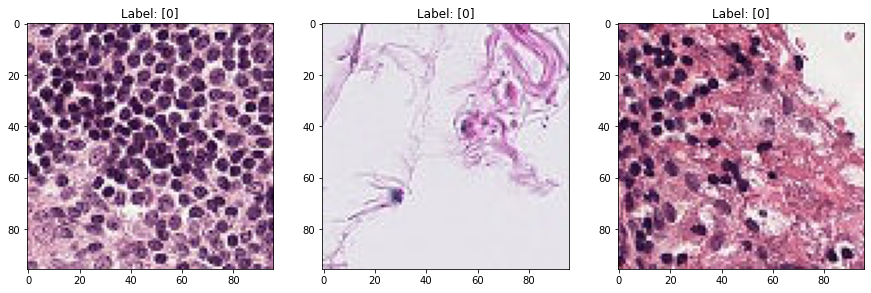

In [77]:
show_images(random.sample(test_positive, 3), test_X, test_y, "Test samples:")
show_images(random.sample(test_negative, 3), test_X, test_y, "")